<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Exercises_XP_W8D2pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install nltk

In [10]:
# Import necessary libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [22]:
import spacy

In [35]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
from gensim.models import Word2Vec

In [38]:
from nltk.util import ngrams

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [60]:
# Test the function
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

# 1. Function to Preprocess Text

In [61]:
def preprocess_text(data):
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # List to store preprocessed strings
    preprocessed_texts = []

    for review in data['Review']:
        # Convert text to lowercase
        review = review.lower()

        # Tokenize text
        tokens = word_tokenize(review)

        # Remove punctuation
        tokens = [token for token in tokens if token not in string.punctuation]

        # Apply lemmatization and remove stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

        # Join tokens back into a string
        preprocessed_text = ' '.join(tokens)

        # Append preprocessed text to the list
        preprocessed_texts.append(preprocessed_text)

    # Return the list of preprocessed texts
    return preprocessed_texts


# 2. Create a New Dataset with the Cleaned Text

In [62]:
preprocessed_data = preprocess_text(data)

# Create a new dataset with the cleaned text
cleaned_data = {'Preprocessed Review': preprocessed_data}

# Print the cleaned dataset
print(cleaned_data)

{'Preprocessed Review': ["mcdonald 's food ok service bad", 'would recommend japanese restaurant anyone', 'loved restaurant traveled thailand last summer', 'menu loving wide variety option', "staff friendly helpful google 's employee restaurant", 'ambiance bella italia amazing pasta dish delicious', 'terrible experience pizza hut pizza burnt service slow', 'sushi sushi express always fresh flavorful', 'steakhouse main street cozy atmosphere excellent steak', 'dessert selection sweet treat die']}


# 3. Function to Perform Named Entity Recognition (NER)

In [63]:
def perform_ner(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Test the function
for text in preprocessed_data:
    print(perform_ner(text))

[("mcdonald 's", 'ORG')]
[('japanese', 'NORP')]
[('thailand', 'GPE'), ('last summer', 'DATE')]
[]
[('google', 'ORG')]
[('ambiance bella italia', 'ORG')]
[]
[('sushi sushi express', 'PERSON')]
[]
[]


# 4. Function to Perform Part-of-Speech (POS) Tagging

In [30]:
def perform_pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Test the function
for text in preprocessed_data:
    print(perform_pos_tagging(text))

[('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('service', 'NN'), ('bad', 'JJ')]
[('would', 'MD'), ('recommend', 'VB'), ('japanese', 'JJ'), ('restaurant', 'NN'), ('anyone', 'NN')]
[('loved', 'VBN'), ('restaurant', 'NN'), ('traveled', 'VBN'), ('thailand', 'NN'), ('last', 'JJ'), ('summer', 'NN')]
[('menu', 'NN'), ('loving', 'VBG'), ('wide', 'JJ'), ('variety', 'NN'), ('option', 'NN')]
[('staff', 'NN'), ('friendly', 'RB'), ('helpful', 'JJ'), ('google', 'NN'), ("'s", 'POS'), ('employee', 'NN'), ('restaurant', 'NN')]
[('ambiance', 'NN'), ('bella', 'NN'), ('italia', 'NN'), ('amazing', 'VBG'), ('pasta', 'JJ'), ('dish', 'JJ'), ('delicious', 'NN')]
[('terrible', 'JJ'), ('experience', 'NN'), ('pizza', 'NN'), ('hut', 'NN'), ('pizza', 'NN'), ('burnt', 'JJ'), ('service', 'NN'), ('slow', 'VB')]
[('sushi', 'NN'), ('sushi', 'NN'), ('express', 'NN'), ('always', 'RB'), ('fresh', 'JJ'), ('flavorful', 'NN')]
[('steakhouse', 'NN'), ('main', 'JJ'), ('street', 'NN'), ('cozy', 'NNS'), ('atmo

# 5. Applying the Functions to Both Raw and Preprocessed Data

In [31]:
# Applying functions to the raw data
print("Raw Data:")
print("NER tagging:")
for review in data['Review']:
    print(perform_ner(review))
print("\nPOS tagging:")
for review in data['Review']:
    print(perform_pos_tagging(review))

# Applying functions to the preprocessed data
print("\nPreprocessed Data:")
print("NER tagging:")
for text in preprocessed_data:
    print(perform_ner(text))
print("\nPOS tagging:")
for text in preprocessed_data:
    print(perform_pos_tagging(text))

Raw Data:
NER tagging:
[("McDonald's", 'ORG')]
[('Japanese', 'NORP')]
[('Thailand', 'GPE'), ('last summer', 'DATE')]
[('Loving', 'GPE')]
[('Google', 'ORG')]
[('Bella Italia', 'ORG')]
[('Pizza Hut', 'ORG')]
[('Sushi Express', 'ORG')]
[('Main Street', 'FAC')]
[('Sweet Treats', 'FAC')]

POS tagging:
[('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
[('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')]
[('I', 'PRP'), ('loved', 'VBD'), ('this', 'DT'), ('restaurant', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('traveled', 'VBD'), ('to', 'TO'), ('Thailand', 'NNP'), ('last', 'JJ'), ('summer', 'NN'), ('.', '.')]
[('The', 'DT'), ('menu', 'NN'), ('of', 'IN'), ('Loving', 'NNP'), ('has', 'VBZ'), ('a', 'DT'), ('wide', 'JJ'), ('variety', 'N

# Exercise 2: Plotting The Word Embeddings

In [33]:
# Convert preprocessed data into a list of lists
preprocessed_tokenized_data = [text.split() for text in preprocessed_data]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=preprocessed_tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Print dimensions of Word2Vec object
print("Dimensions of Word2Vec object:", word2vec_model.wv.vector_size)


Dimensions of Word2Vec object: 100



The vector dimensions refer to the size of the word vectors generated by the Word2Vec model. In the context of Word2Vec, each word in the vocabulary is represented as a high-dimensional vector, where each dimension captures some aspect of the word's meaning or context.

In this case, the Word2Vec model has been configured to generate word vectors of size 100 (vector_size=100). This means that each word in the vocabulary will be represented by a vector of length 100.

The 100-dimensional vector for each word encapsulates various semantic and syntactic properties of the word learned from the training data. These properties are derived from the context in which the word appears in the corpus. For example, words that appear in similar contexts are likely to have similar vector representations.

So, the vector dimensions represent different features or characteristics of the words in a high-dimensional space, where words with similar meanings or usage tend to have similar vector representations. These vectors are then used in downstream natural language processing tasks for tasks like semantic similarity, document classification, or sentiment analysis.

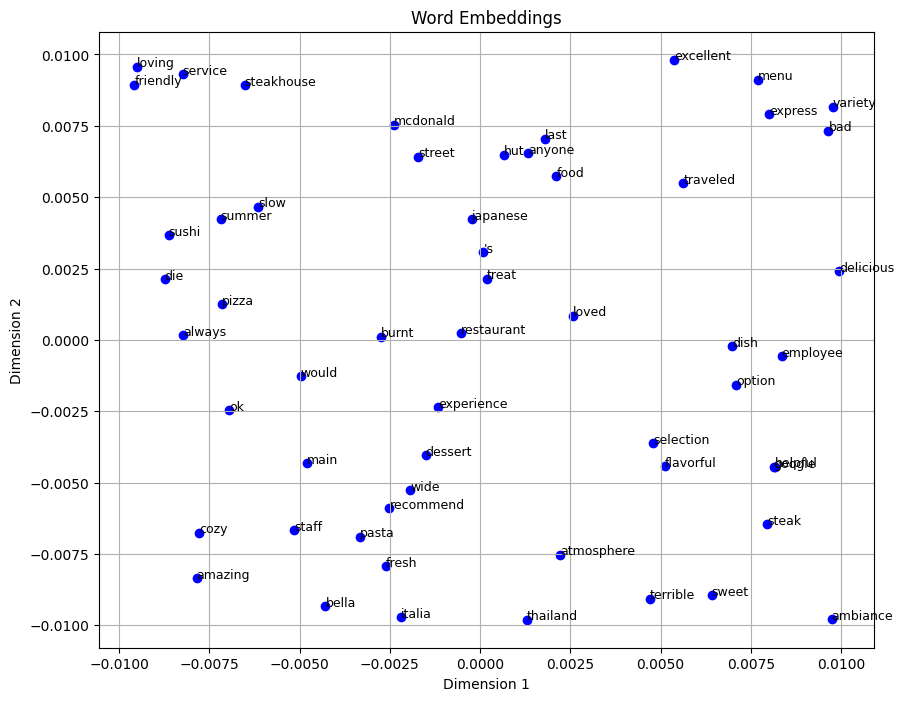

In [36]:
def plot_word_embeddings(word2vec_model):
    # Extract word vectors and corresponding words
    vectors = word2vec_model.wv.vectors
    words = word2vec_model.wv.index_to_key

    # Plot word embeddings
    plt.figure(figsize=(10, 8))
    for word, vector in zip(words, vectors):
        plt.scatter(vector[0], vector[1], marker='o', color='b')
        plt.text(vector[0], vector[1], word, fontsize=9)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word Embeddings')
    plt.grid(True)
    plt.show()

# Call the function to plot word embeddings
plot_word_embeddings(word2vec_model)

In [43]:
# Generate N-grams
def generate_ngrams(text, n):
    # Generate N-grams
    ngrams_list = list(ngrams(text, n))

    # Return the N-grams as a list of strings
    return [' '.join(gram) for gram in ngrams_list]

# Example usage
n = 2  # Change to desired n-gram size
preprocessed_data = preprocess_text(data)
for text in preprocessed_data:
    print(f"N-grams for '{text}':")
    ngrams_list = generate_ngrams(text.split(), n)
    print(ngrams_list)
    print()

N-grams for 'mcdonald 's food ok service bad':
["mcdonald 's", "'s food", 'food ok', 'ok service', 'service bad']

N-grams for 'would recommend japanese restaurant anyone':
['would recommend', 'recommend japanese', 'japanese restaurant', 'restaurant anyone']

N-grams for 'loved restaurant traveled thailand last summer':
['loved restaurant', 'restaurant traveled', 'traveled thailand', 'thailand last', 'last summer']

N-grams for 'menu loving wide variety option':
['menu loving', 'loving wide', 'wide variety', 'variety option']

N-grams for 'staff friendly helpful google 's employee restaurant':
['staff friendly', 'friendly helpful', 'helpful google', "google 's", "'s employee", 'employee restaurant']

N-grams for 'ambiance bella italia amazing pasta dish delicious':
['ambiance bella', 'bella italia', 'italia amazing', 'amazing pasta', 'pasta dish', 'dish delicious']

N-grams for 'terrible experience pizza hut pizza burnt service slow':
['terrible experience', 'experience pizza', 'pizza 

N-grams: Experiment with generating n-grams (sequences of n consecutive words) instead of single words. This can capture more contextual information, especially for tasks involving phrases or collocations.

In [80]:
import pandas as pd

# URL of the evaluation data
url = 'https://raw.githubusercontent.com/AdrienGuille/DistributionalSemantics/master/evaluation_data/wordsim353.tsv'

# Read the contents of the file
df = pd.read_csv(url, sep='\t', header=None)

# Display the first few rows of the DataFrame
print(df.head())


          0         1      2
0      love       sex   6.77
1     tiger       cat   7.35
2     tiger     tiger  10.00
3      book     paper   7.46
4  computer  keyboard   7.62


In [97]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[text.split() for text in preprocessed_texts],
                          vector_size=100, window=5, min_count=1, workers=4)

# Print dimensions of Word2Vec object
print("Dimensions of Word2Vec object:", word2vec_model.wv.vector_size)

# Evaluate cosine similarity between 'good' and 'bad'
word1 = "ok"
word2 = "bad"
if word1 in word2vec_model.wv.index_to_key and word2 in word2vec_model.wv.index_to_key:
    similarity = cosine_similarity([word2vec_model.wv[word1]], [word2vec_model.wv[word2]])[0][0]
    print("Cosine Similarity between '{}' and '{}': {:.4f}".format(word1, word2, similarity))
else:
    print("Words '{}' and '{}' are not present in the vocabulary.".format(word1, word2))


Dimensions of Word2Vec object: 100
Cosine Similarity between 'ok' and 'bad': 0.1190


In [102]:
# Define a range of vector sizes to experiment with
vector_sizes = [5, 10, 25, 50, 75, 100, 200, 300]

for vector_size in vector_sizes:
    # Train Word2Vec model
    word2vec_model = Word2Vec(sentences=[text.split() for text in preprocessed_texts],
                              vector_size=vector_size, window=5, min_count=1, workers=4)

    # Print dimensions of Word2Vec object
    print("Dimensions of Word2Vec object with vector size {}: {}".format(vector_size, word2vec_model.wv.vector_size))

    # Evaluate cosine similarity between 'ok' and 'bad'
    word1 = "ok"
    word2 = "bad"
    if word1 in word2vec_model.wv.index_to_key and word2 in word2vec_model.wv.index_to_key:
        similarity = cosine_similarity([word2vec_model.wv[word1]], [word2vec_model.wv[word2]])[0][0]
        print("Cosine Similarity between '{}' and '{}': {:.4f}".format(word1, word2, similarity))
    else:
        print("Words '{}' and '{}' are not present in the vocabulary.".format(word1, word2))

Dimensions of Word2Vec object with vector size 5: 5
Cosine Similarity between 'ok' and 'bad': 0.6488
Dimensions of Word2Vec object with vector size 10: 10
Cosine Similarity between 'ok' and 'bad': -0.1667
Dimensions of Word2Vec object with vector size 25: 25
Cosine Similarity between 'ok' and 'bad': 0.0256
Dimensions of Word2Vec object with vector size 50: 50
Cosine Similarity between 'ok' and 'bad': -0.2316
Dimensions of Word2Vec object with vector size 75: 75
Cosine Similarity between 'ok' and 'bad': -0.0864
Dimensions of Word2Vec object with vector size 100: 100
Cosine Similarity between 'ok' and 'bad': 0.1190
Dimensions of Word2Vec object with vector size 200: 200
Cosine Similarity between 'ok' and 'bad': 0.0210
Dimensions of Word2Vec object with vector size 300: 300
Cosine Similarity between 'ok' and 'bad': -0.0319


In [98]:
# Get the vocabulary of the Word2Vec model
vocab = word2vec_model.wv.index_to_key

# Print the vocabulary
print("Vocabulary:")
for word in vocab:
    print(word)


Vocabulary:
restaurant
sushi
's
service
pizza
die
google
helpful
friendly
staff
option
variety
wide
loving
menu
summer
thailand
last
ambiance
traveled
loved
anyone
japanese
recommend
would
bad
ok
food
employee
bella
treat
italia
sweet
selection
dessert
steak
excellent
atmosphere
cozy
street
main
steakhouse
flavorful
fresh
always
express
slow
burnt
hut
experience
terrible
delicious
dish
pasta
amazing
mcdonald


In [104]:
example_result = word2vec_model.wv.most_similar(positive=['recommend', 'restaurant'], negative=['pizza'], topn=1)
print(example_result)

[('japanese', 0.13258633017539978)]


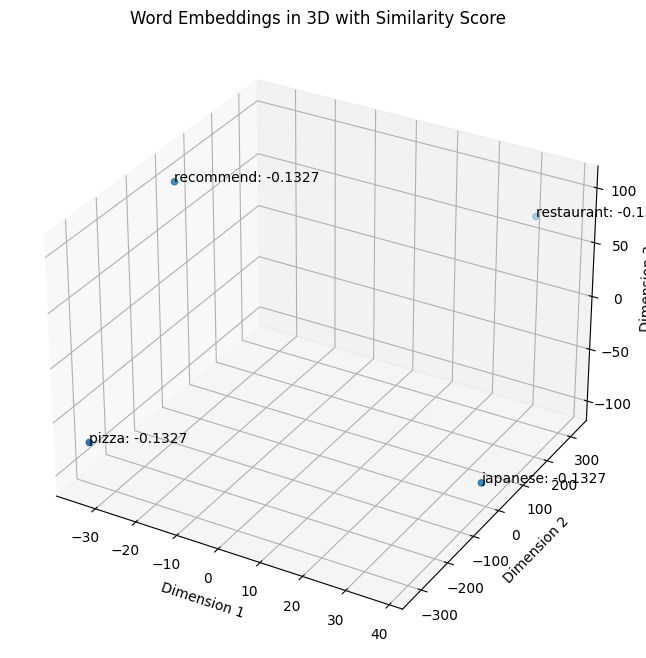

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[text.split() for text in preprocessed_texts],
                          vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors for positive and negative words
positive_words = ['recommend', 'restaurant']
negative_words = ['pizza']
word_vectors = [word2vec_model.wv[word] for word in positive_words + negative_words]

# Retrieve the word vector for 'japanese' from the Word2Vec model
japanese_word_vector = word2vec_model.wv['japanese']

# Add the 'japanese' word vector to the list of word vectors
word_vectors.append(japanese_word_vector)

# Convert list of vectors to 2D NumPy array
word_vectors_array = np.array(word_vectors)

# Reduce dimensionality of word embeddings using t-SNE
tsne = TSNE(n_components=3, perplexity=1, random_state=42)  # Adjust perplexity here
word_vectors_3d = tsne.fit_transform(word_vectors_array)

# Calculate similarity score manually
similarity_score = np.dot(word_vectors[0], word_vectors[1]) / (np.linalg.norm(word_vectors[0]) * np.linalg.norm(word_vectors[1]))

# Visualize word embeddings in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2])

# Annotate points with words and similarity score
words_to_annotate = positive_words + negative_words + ['japanese']
for i, word in enumerate(words_to_annotate):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], f'{word}: {similarity_score:.4f}')

# Set axis labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('Word Embeddings in 3D with Similarity Score')
plt.show()



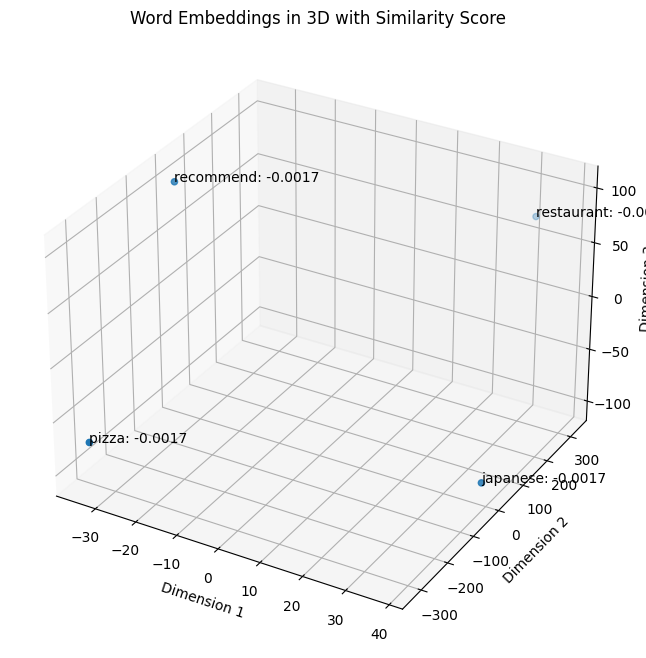

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[text.split() for text in preprocessed_texts],
                          vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors for positive and negative words
positive_words = ['recommend', 'restaurant']
negative_words = ['pizza']

# Retrieve the word vector for 'japanese' from the Word2Vec model
japanese_word_vector = word2vec_model.wv['japanese']

# Reduce dimensionality of word embeddings using t-SNE
tsne = TSNE(n_components=3, perplexity=1, random_state=42)  # Adjust perplexity here
word_vectors_3d = tsne.fit_transform(np.concatenate((word2vec_model.wv[positive_words + negative_words], [japanese_word_vector]), axis=0))

# Calculate similarity score manually
similarity_score = np.dot(word_vectors_3d[0], word_vectors_3d[1]) / (np.linalg.norm(word_vectors_3d[0]) * np.linalg.norm(word_vectors_3d[1]))

# Visualize word embeddings in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2])

# Annotate points with words and similarity score
words_to_annotate = positive_words + negative_words + ['japanese']
for i, word in enumerate(words_to_annotate):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], f'{word}: {similarity_score:.4f}')

# Set axis labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('Word Embeddings in 3D with Similarity Score')
plt.show()
